Import des bibliothèques et ressources nécessaires :

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sns
from matplotlib.ticker import AutoMinorLocator

%matplotlib inline

Choix du dataset sur Kaggle : kaggle.com/shree1992/housedata

Phase no. 1, Exploration et nettoyage des données : 
    Data exploration & Data cleaning

In [4]:
# Chargement des données
raw_data = pd.read_csv('housing.csv')
# Résumé des données brutes (Avant nettoyage)
raw_data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


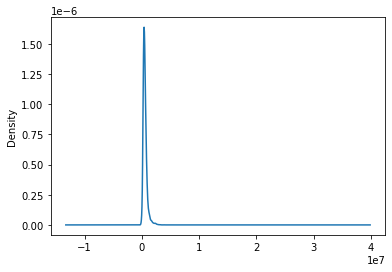

In [5]:
# Effectuons un zoom sur 5 éléments
raw_data.sample(5)
# Outliers à +1M
raw_data['price'].plot(kind='kde')

In [6]:
# Il y a quelques valeurs manquantes, on supprime ces lignes
data_na = raw_data.dropna()

# Pour réduire les données, on s'intéresse aux biens de moins de 900k et supérieur à 300k
data = data_na[data_na["price"] < 900000]
data = data[data["price"] > 300000]

# On reindexe
data = data.reset_index(drop = True)

# Drop unwanted columns : Colonnes où les corrélations sont moindres
data.drop('floors', inplace=True, axis=1)
# data.drop('sqft_living', inplace=True, axis=1)
data.drop('sqft_lot', inplace=True, axis=1)
data.drop('condition', inplace=True, axis=1)
data.drop('sqft_above', inplace=True, axis=1)
data.drop('sqft_basement', inplace=True, axis=1)
data.drop('street', inplace=True, axis=1)
data.drop('city', inplace=True, axis=1)
data.drop('country', inplace=True, axis=1)
data


,date,price,bedrooms,bathrooms,sqft_living,waterfront,view,yr_built,yr_renovated,statezip
0,2014-05-02 00:00:00,313000.000000,3.0,1.50,1340,0,0,1955,2005,WA 98133
1,2014-05-02 00:00:00,342000.000000,3.0,2.00,1930,0,0,1966,0,WA 98042
2,2014-05-02 00:00:00,420000.000000,3.0,2.25,2000,0,0,1963,0,WA 98008
3,2014-05-02 00:00:00,550000.000000,4.0,2.50,1940,0,0,1976,1992,WA 98052
4,2014-05-02 00:00:00,490000.000000,2.0,1.00,880,0,0,1938,1994,WA 98115
...,...,...,...,...,...,...,...,...,...,...
3146,2014-07-08 00:00:00,380680.555556,4.0,2.50,2620,0,0,1991,0,WA 98058
3147,2014-07-08 00:00:00,396166.666667,3.0,1.75,1880,0,0,1945,0,WA 98126
3148,2014-07-09 00:00:00,308166.666667,3.0,1.75,1510,0,0,1954,1979,WA 98133
3149,2014-07-09 00:00:00,534333.333333,3.0,2.50,1460,0,0,1983,2009,WA 98007


In [7]:
data['statezip'] = data['statezip'].apply(lambda x : x.split()[1] )

Phase no. 2, Modélisation (X et y) puis entraînement d’un modèle de Machine learning
Choix de la variable à prédire

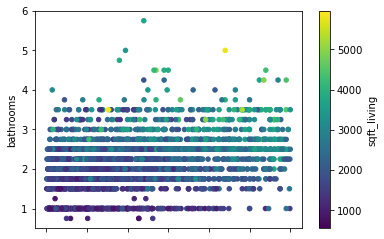

In [8]:
# On affiche les données nettoyées
# 3 critères sont pris en compte : Le prix en abscisse, le nombre de Bedroom et de Bathroom
# Prix X : abscisse ; Bathroom & coloured Square Feet Living  Y : ordonnée
data.plot.scatter("price", "bathrooms", c="sqft_living", colormap='viridis')

On affiche maintenant la variable prédite (prix de la maison) en fonction du nombre de chambres

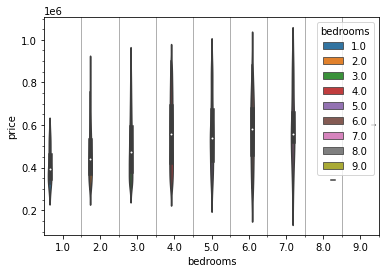

In [9]:
ax1 = sns.violinplot("bedrooms", "price", data=data, hue='bedrooms')
ax1.minorticks_on()
ax1.xaxis.set_minor_locator(AutoMinorLocator(2))
ax1.grid(which='minor', axis='x', linewidth=1) 

Ici on va donc essayer de prédire le prix de la maison en fonction du nombre de chambres.
On constate une marge croissante sur le prix en fonction de ce nombre de chambres.

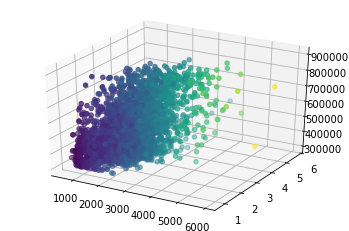

In [10]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure().gca(projection='3d')

# Pour une visualisation 3D avec le nombre de salle de bains
tmp_arr = data['sqft_living']

fig.scatter(tmp_arr, data['bathrooms'], data['price'], c=tmp_arr, cmap="viridis")
plt.show()

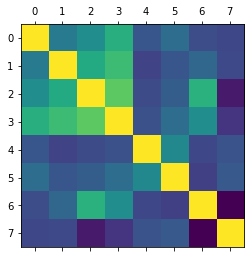

In [11]:
plt.matshow(data.corr())
plt.show()

In [12]:
data

,date,price,bedrooms,bathrooms,sqft_living,waterfront,view,yr_built,yr_renovated,statezip
0,2014-05-02 00:00:00,313000.000000,3.0,1.50,1340,0,0,1955,2005,98133
1,2014-05-02 00:00:00,342000.000000,3.0,2.00,1930,0,0,1966,0,98042
2,2014-05-02 00:00:00,420000.000000,3.0,2.25,2000,0,0,1963,0,98008
3,2014-05-02 00:00:00,550000.000000,4.0,2.50,1940,0,0,1976,1992,98052
4,2014-05-02 00:00:00,490000.000000,2.0,1.00,880,0,0,1938,1994,98115
...,...,...,...,...,...,...,...,...,...,...
3146,2014-07-08 00:00:00,380680.555556,4.0,2.50,2620,0,0,1991,0,98058
3147,2014-07-08 00:00:00,396166.666667,3.0,1.75,1880,0,0,1945,0,98126
3148,2014-07-09 00:00:00,308166.666667,3.0,1.75,1510,0,0,1954,1979,98133
3149,2014-07-09 00:00:00,534333.333333,3.0,2.50,1460,0,0,1983,2009,98007


In [13]:
data.corr()

,price,bedrooms,bathrooms,sqft_living,waterfront,view,yr_built,yr_renovated
price,1.000000,0.221722,0.323735,0.506420,0.023620,0.144836,-0.016891,-0.041017
bedrooms,0.221722,1.000000,0.483879,0.583747,-0.059827,0.027184,0.110462,-0.038862
bathrooms,0.323735,0.483879,1.000000,0.666945,-0.025809,0.064618,0.521089,-0.235122
sqft_living,0.506420,0.583747,0.666945,1.000000,-0.001180,0.147114,0.321906,-0.125314
waterfront,0.023620,-0.059827,-0.025809,-0.001180,1.000000,0.292118,-0.044316,0.012008
view,0.144836,0.027184,0.064618,0.147114,0.292118,1.000000,-0.077304,0.041414
yr_built,-0.016891,0.110462,0.521089,0.321906,-0.044316,-0.077304,1.000000,-0.330287
yr_renovated,-0.041017,-0.038862,-0.235122,-0.125314,0.012008,0.041414,-0.330287,1.000000


Phase no. 3, Entraînement du modèle, choix X Y, variable à prédire. Analyse de la performance.

In [23]:
# On va effectuer une régression specifique sur chaque salle, pour avoir plus de précision. D'abord, séparation jeu de données d'entraînement / jeu de données test
xtrain, xtest, ytrain, ytest = train_test_split(data[["sqft_living", "bathrooms"]], data[["price"]], test_size=0.15)

# Régression linéaire 
# Créons ensuite la baseline, et calculons le R2 (la somme quadratique des résidus), comme valeur d'évaluation de notre regression.
lr = LinearRegression()
lr_baseline = lr.fit(xtrain, ytrain)
baseline_pred = lr_baseline.predict(xtest)

lr_baseline.score(xtest, ytest)

# X sqft_living : le pied carré d'habitation Y : le prix prédit.
# Ici le X qui décrit mieux le prix finale est bien le sqft_living

0.3169662286477176

On réécrit rapidement le calcul du R2 score

In [15]:
def sumsq(x,y):
    return sum((x - y)**2)

def r2score(pred, target):
    return 1 - sumsq(pred, target) / sumsq(target, np.mean(target))

score_bl = r2score(baseline_pred[:,0], ytest['price'])

print(score_bl)

0.2597457336707829


In [19]:
lrs = []
for i in np.unique(xtrain["bathrooms"]):
    
    # On génère un jeu de données
    tr_arr = xtrain['bathrooms']==i
    te_arr = xtest['bathrooms']==i
    
    xtrain_arr = xtrain[tr_arr]
    ytrain_arr = ytrain[tr_arr]

    xtest_arr = xtest[te_arr]
    ytest_arr = ytest[te_arr]

    lr = LinearRegression()
    lr.fit(xtrain_arr[["sqft_living"]], ytrain_arr)
    lrs.append(lr)

On effectue puis affiche la prédiction finale sur le jeu de donnée test avec notre nouveau modèle, qui combine les différents modèles par salle de bains

Phase no. 4, Prédiction.

In [17]:
final_pred = []

for idx,val in xtest.iterrows():
    final_pred.append(lrs[int(val["bathrooms"]-1)].predict([[val["sqft_living"]]])[0][0])
    
r2score(final_pred, ytest["price"])

-0.10054310215107454

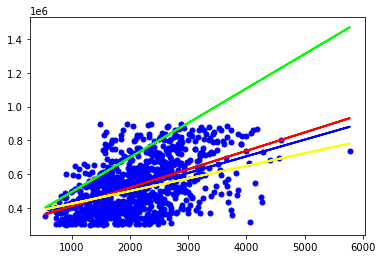

In [18]:
plt.plot(xtest[["sqft_living"]], ytest, 'bo', markersize = 5)
plt.plot(xtest[["sqft_living"]], lrs[1].predict(xtest[["sqft_living"]]), color="#0000FF", linewidth = 2)
plt.plot(xtest[["sqft_living"]], lrs[2].predict(xtest[["sqft_living"]]), color="#00FF00", linewidth = 2)
plt.plot(xtest[["sqft_living"]], lrs[3].predict(xtest[["sqft_living"]]), color="#FF0000", linewidth = 2)
plt.plot(xtest[["sqft_living"]], lrs[4].predict(xtest[["sqft_living"]]), color="#FFFF00", linewidth = 2)

In [24]:
import pickle

# save the model to disk
filename = 'house_model.pkl'
pickle.dump(lr_baseline, open(filename, 'wb'))

# load the model from disk
lr_baseline = pickle.load(open(filename, 'rb'))
lr_baseline

LinearRegression()

In [38]:
lr_baseline.predict(np.array([3000, 4]).reshape(1,-1))

array([[607201.45614135]])